<a href="https://colab.research.google.com/github/ancestor9/2026_Spring_Modeling-and-Simulation/blob/main/%EC%84%B8%ED%8F%AC%EA%B0%90%EC%97%BC_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Module 1: 모델링의 기본 개념 및 정상 세포 증식

In [8]:
# 1. 모델 함수 정의 (dX/dt = X/24)
def cell_growth(t, X):
    # 세포 분열 상수 (1/24 h)
    return X / 24

# Module 2: 지수적 성장 (Exponential Growth)

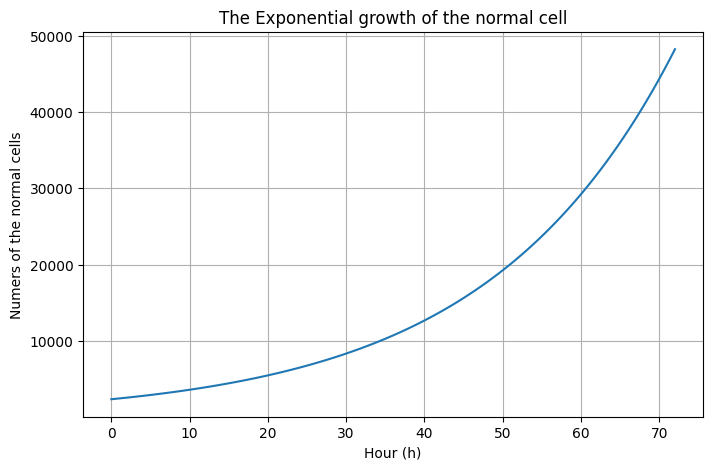


초기 세포수 (X(0)): 2400


72시간 후 예측 세포 수 (이론값): 48205.29


In [9]:

# 2. 초기 조건 설정
X0 = 2400  # 초기 세포 수 (예시)
t_span =  (0, 72) # 시뮬레이션 시간 (0시간부터 72시간까지) - 튜플로 수정
t_points = np.linspace(t_span[0], t_span[1], 100) # 그래프 출력을 위한 시간 간격

# 3. 미분방정식 풀이 (수치적 적분)
solution = solve_ivp(cell_growth, t_span, [X0], t_eval=t_points)

# 4. 결과 시각화
plt.figure(figsize=(8, 5))
plt.plot(solution.t, solution.y[0], label='Cell Count X(t)') # solution.y가 2D 배열이므로 첫 번째 행 선택
plt.xlabel('Hour (h)')
plt.ylabel('Numers of the normal cells')
plt.title('The Exponential growth of the normal cell')
plt.grid(True)
plt.show()

# 5. 72시간 후 예측값 확인 (이론적 예측: X(0) * e^3)
X_72_predicted = X0 * (np.exp(1)**(72/24))
print(f"\n초기 세포수 (X(0)): {X0}")
print(f"\n\n72시간 후 예측 세포 수 (이론값): {X_72_predicted:.2f}")

# Module 3: 복잡한 상호작용 모델 (감염 모델)
- 현실의 생명 시스템은 복잡하며, 정상 세포(X)가 감염 세포(Y)와 상호작용하며 감소하는 경우를 가정해 수리 모델링을 확장

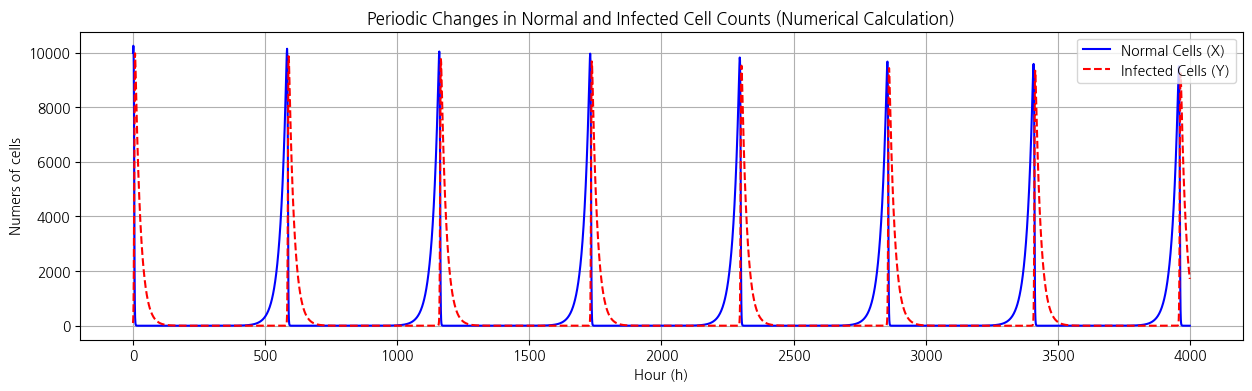

In [25]:
# 1. 모델 함수 정의 (dX/dt, dY/dt 시스템)
def interaction_model(t, Z):
    # Z = X (정상 세포), Z[1] = Y (감염 세포)
    X, Y = Z

    # 모델 상수 설정
    A = 1/24 # 정상 세포 증식율 (1/24 h)
    k = 0.0001 # 감염 속도 상수 (k값이 클수록 감염 속도 빠름)
    d = 0.05  # 감염 세포 사멸 속도 상수

    dXdt = A * X - k * X * Y
    dYdt = k * X * Y - d * Y

    return [dXdt, dYdt]

# 2. 초기 조건 설정
Z0 = [10000, 100] # 초기 [X0, Y0] (정상 세포 10000, 감염 세포 100)
end_t_span = 4000 # 시뮬레이션 마지막 시간
t_span = (0, end_t_span) # 시뮬레이션 시간 (0시간부터 400시간까지) - 튜플로 수정
t_points = np.linspace(0, t_span[1], end_t_span)

# 3. 미분방정식 풀이
solution = solve_ivp(interaction_model, t_span, Z0, t_eval=t_points)

# 4. 결과 시각화
plt.figure(figsize=(15, 4))
plt.plot(solution.t, solution.y[0], label='Normal Cells (X)', color='blue')
plt.plot(solution.t, solution.y[1], label='Infected Cells (Y)', color='red', linestyle='--')
plt.xlabel('Hour (h)')
plt.ylabel('Numers of cells')
plt.title('Periodic Changes in Normal and Infected Cell Counts (Numerical Calculation)')
plt.legend()
plt.grid(True)
plt.show()

### 동적 예측 (Oscillation)
- 컴퓨터로 수치 계산을 하면 정상 세포 수(X)와 감염 세포 수(Y)가 단순히 증가하거나 감소하는 것이 아니라, 오르락내리락하는 주기적인 패턴(직관적 예상과 다르다)

>    ◦ X가 감소하면 kXY가 작아져 Y의 증가 속도가 줄어들고, 결국 Y가 감소

>    ◦ Y가 감소하면 kXY가 작아져 X의 감소 속도가 줄어들고, X가 다시 증가하게 되면서 순환이 반복

- 현실 적용: 이와 같은 주기적인 증감 현상은 전염병 사태(예: COVID-19 확진자 수의 파동)와 같은 사회 현상을 예측하는 데 사용

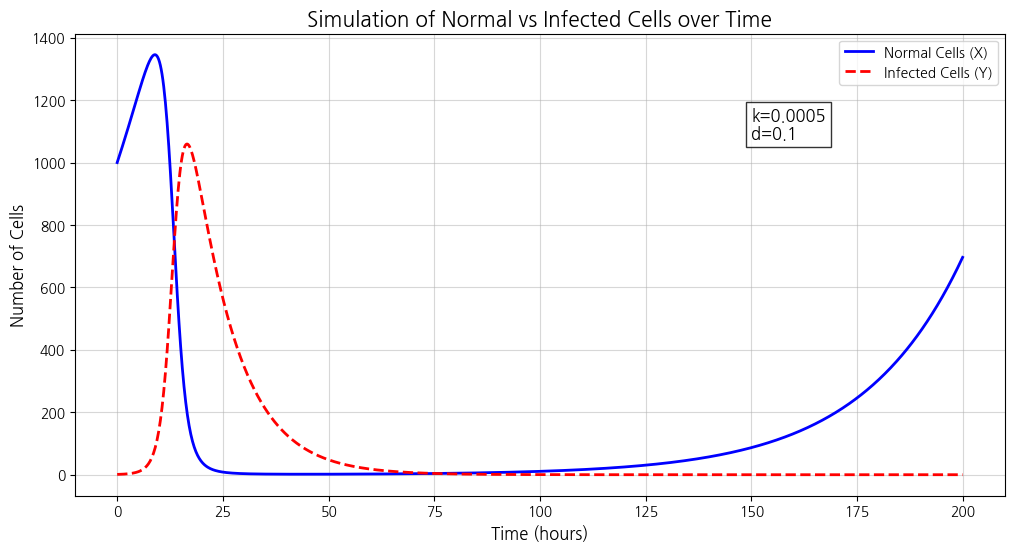

In [26]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 1. 미분방정식 정의 (이미지의 수식 구현)
def cell_dynamics_model(z, t, k, d):
    X, Y = z

    # 식 1: 정상 세포 변화율 (X/24 - kXY)
    dXdt = (X / 24) - (k * X * Y)

    # 식 2: 감염 세포 변화율 (kXY - dY)
    dYdt = (k * X * Y) - (d * Y)

    return [dXdt, dYdt]

# 2. 파라미터 및 초기값 설정
# k(감염 속도)와 d(사멸 속도)는 임의의 값으로 설정했습니다.
# 상황에 맞춰 이 값을 조정하면 그래프 모양이 달라집니다.
k = 0.0005  # 감염 상수 (정상 세포와 만날 때 감염되는 확률)
d = 0.1     # 사멸 상수 (감염 세포가 죽는 비율)

# 초기 상태: 정상 세포 1000개, 감염 세포 1개로 시작
X0 = 1000
Y0 = 1
z0 = [X0, Y0]

# 3. 시간 설정 (0시간부터 200시간까지 시뮬레이션)
t = np.linspace(0, 200, 1000)

# 4. 미분방정식 풀기
solution = odeint(cell_dynamics_model, z0, t, args=(k, d))
X_sol = solution[:, 0] # 정상 세포 결과
Y_sol = solution[:, 1] # 감염 세포 결과

# 5. 그래프 시각화
plt.figure(figsize=(12, 6))

# 정상 세포 그래프 (파란색)
plt.plot(t, X_sol, label='Normal Cells (X)', color='blue', linewidth=2)

# 감염 세포 그래프 (빨간색)
plt.plot(t, Y_sol, label='Infected Cells (Y)', color='red', linestyle='--', linewidth=2)

# 그래프 꾸미기
plt.title('Simulation of Normal vs Infected Cells over Time', fontsize=15)
plt.xlabel('Time (hours)', fontsize=12)
plt.ylabel('Number of Cells', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.5)

# 값 확인을 위한 텍스트 추가 (선택사항)
plt.text(150, max(X_sol)*0.8, f'k={k}\nd={d}', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

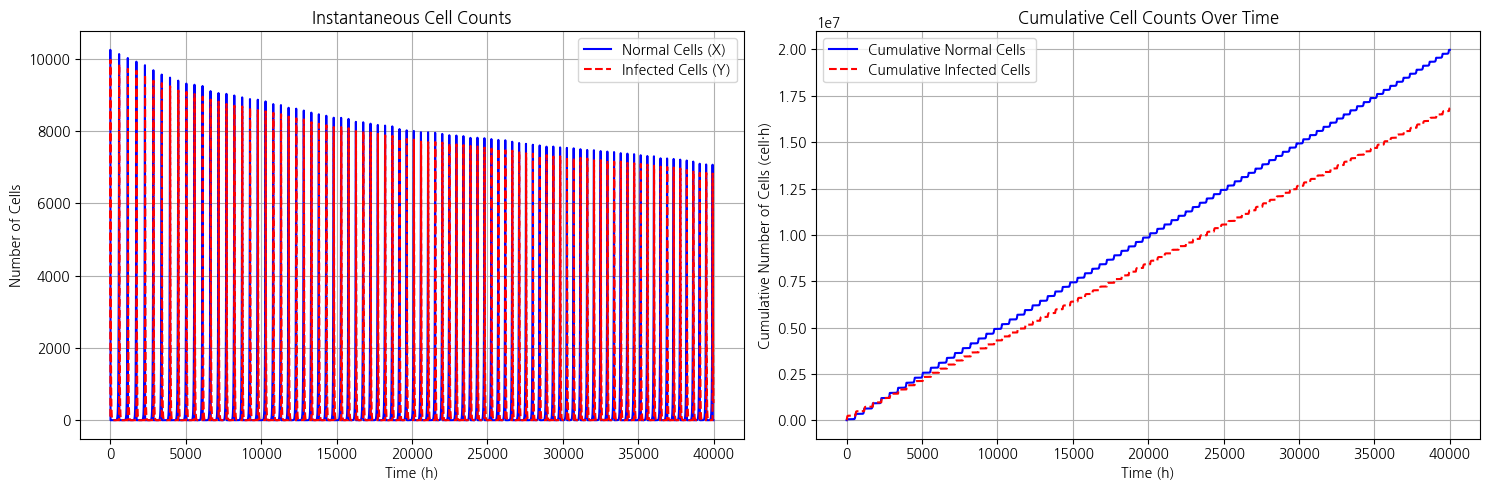

최종 누적 정상 세포수: 19,980,484 cell·h
최종 누적 감염 세포수: 16,843,271 cell·h


In [28]:
import numpy as np
from scipy.integrate import solve_ivp, cumulative_trapezoid
import matplotlib.pyplot as plt

# 1. 모델 함수 정의 (dX/dt, dY/dt 시스템)
def interaction_model(t, Z):
    # Z[0] = X (정상 세포), Z[1] = Y (감염 세포)
    X, Y = Z

    # 모델 상수 설정
    A = 1/24      # 정상 세포 증식율 (1/24 h)
    k = 0.0001    # 감염 속도 상수 (k값이 클수록 감염 속도 빠름)
    d = 0.05      # 감염 세포 사멸 속도 상수

    dXdt = A * X - k * X * Y
    dYdt = k * X * Y - d * Y

    return [dXdt, dYdt]

# 2. 초기 조건 설정
Z0 = [10000, 100]  # 초기 [X0, Y0] (정상 세포 10000, 감염 세포 100)
end_t_span = 40000  # 시뮬레이션 마지막 시간
t_span = (0, end_t_span)  # 시뮬레이션 시간 (0시간부터 4000시간까지)
t_points = np.linspace(0, t_span[1], end_t_span)

# 3. 미분방정식 풀이
solution = solve_ivp(interaction_model, t_span, Z0, t_eval=t_points)

# 4. 누적 세포수 계산 (시간에 따른 적분)
cumulative_X = cumulative_trapezoid(solution.y[0], solution.t, initial=0)
cumulative_Y = cumulative_trapezoid(solution.y[1], solution.t, initial=0)

# 5. 결과 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 왼쪽: 순간 세포수
ax1.plot(solution.t, solution.y[0], label='Normal Cells (X)', color='blue')
ax1.plot(solution.t, solution.y[1], label='Infected Cells (Y)', color='red', linestyle='--')
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('Number of Cells')
ax1.set_title('Instantaneous Cell Counts')
ax1.legend()
ax1.grid(True)

# 오른쪽: 누적 세포수
ax2.plot(solution.t, cumulative_X, label='Cumulative Normal Cells', color='blue')
ax2.plot(solution.t, cumulative_Y, label='Cumulative Infected Cells', color='red', linestyle='--')
ax2.set_xlabel('Time (h)')
ax2.set_ylabel('Cumulative Number of Cells (cell·h)')
ax2.set_title('Cumulative Cell Counts Over Time')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# 최종 누적값 출력
print(f"최종 누적 정상 세포수: {cumulative_X[-1]:,.0f} cell·h")
print(f"최종 누적 감염 세포수: {cumulative_Y[-1]:,.0f} cell·h")

/tmp/ipython-input-3132663171.py:41: RuntimeWarning: invalid value encountered in divide
  cumulative_infection_rate = cumulative_Y / cumulative_total


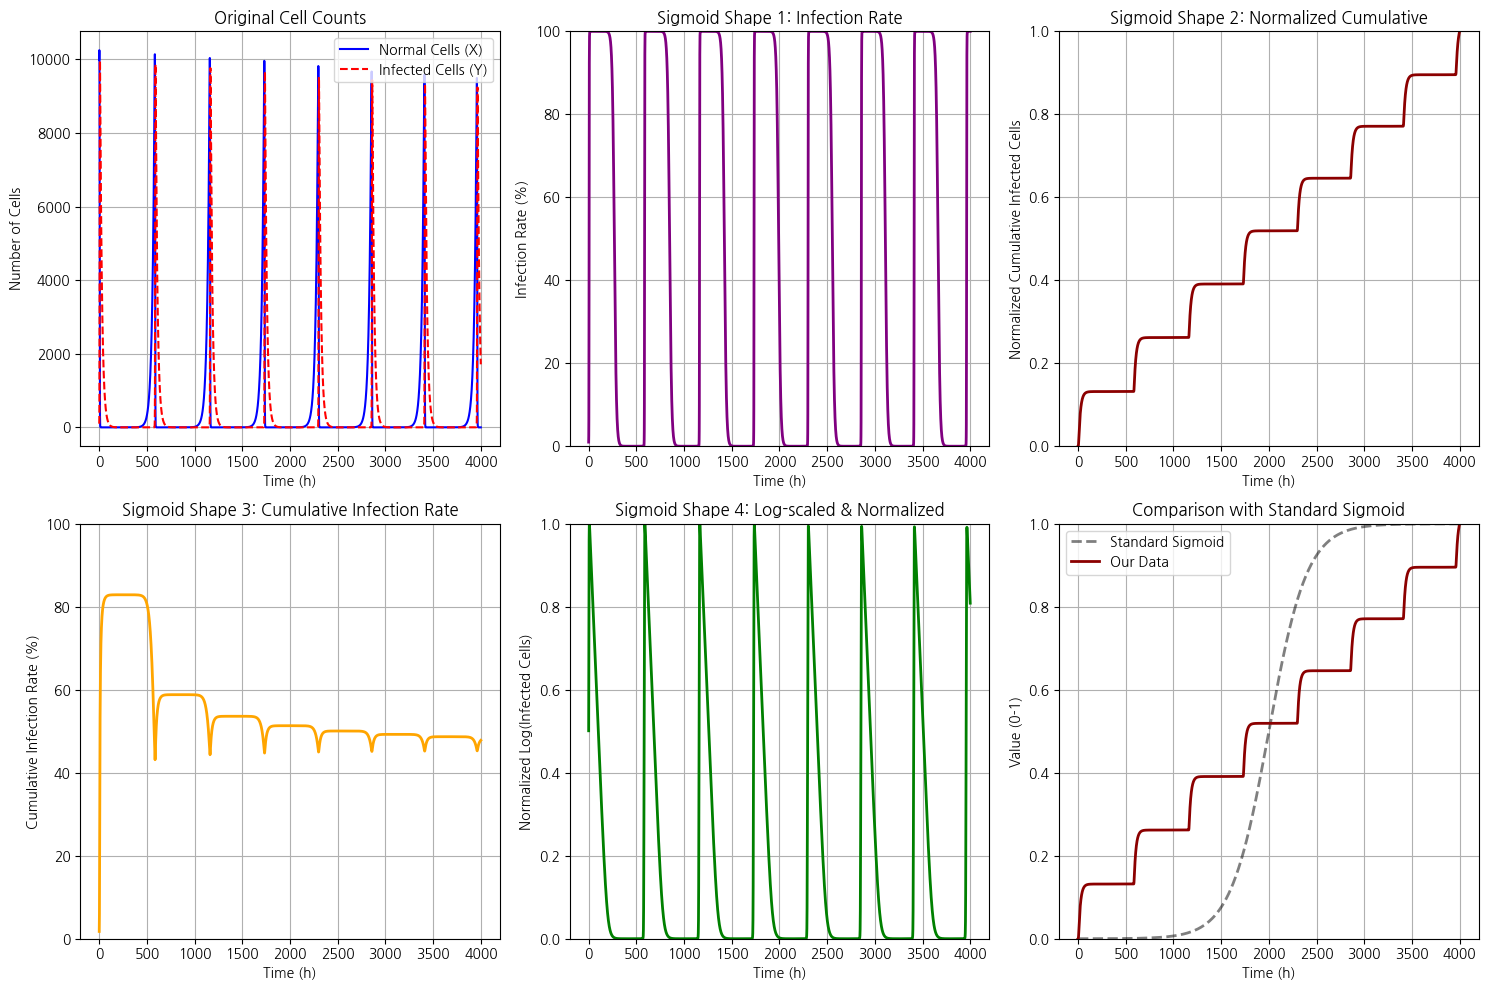

시그모이드 형태 분석 결과
최종 감염률: 100.00%
최대 감염률: 100.00%
중간점(50% 감염) 도달 시간: 1422 시간


In [29]:
import numpy as np
from scipy.integrate import solve_ivp, cumulative_trapezoid
import matplotlib.pyplot as plt

# 1. 모델 함수 정의 (dX/dt, dY/dt 시스템)
def interaction_model(t, Z):
    # Z[0] = X (정상 세포), Z[1] = Y (감염 세포)
    X, Y = Z

    # 모델 상수 설정
    A = 1/24      # 정상 세포 증식율 (1/24 h)
    k = 0.0001    # 감염 속도 상수 (k값이 클수록 감염 속도 빠름)
    d = 0.05      # 감염 세포 사멸 속도 상수

    dXdt = A * X - k * X * Y
    dYdt = k * X * Y - d * Y

    return [dXdt, dYdt]

# 2. 초기 조건 설정
Z0 = [10000, 100]  # 초기 [X0, Y0] (정상 세포 10000, 감염 세포 100)
end_t_span = 4000  # 시뮬레이션 마지막 시간
t_span = (0, end_t_span)  # 시뮬레이션 시간 (0시간부터 4000시간까지)
t_points = np.linspace(0, t_span[1], end_t_span)

# 3. 미분방정식 풀이
solution = solve_ivp(interaction_model, t_span, Z0, t_eval=t_points)

# 4. 시그모이드 형태 데이터 계산
# 방법 1: 감염률 (Infection Rate)
total_cells = solution.y[0] + solution.y[1]
infection_rate = solution.y[1] / total_cells

# 방법 2: 누적 감염 세포수 정규화
cumulative_Y = cumulative_trapezoid(solution.y[1], solution.t, initial=0)
normalized_cumulative_Y = cumulative_Y / cumulative_Y[-1]  # 0~1 사이로 정규화

# 방법 3: 누적 총 세포수 대비 누적 감염 세포수
cumulative_X = cumulative_trapezoid(solution.y[0], solution.t, initial=0)
cumulative_total = cumulative_X + cumulative_Y
cumulative_infection_rate = cumulative_Y / cumulative_total

# 5. 결과 시각화
fig = plt.figure(figsize=(15, 10))

# 서브플롯 1: 원본 세포수
ax1 = plt.subplot(2, 3, 1)
ax1.plot(solution.t, solution.y[0], label='Normal Cells (X)', color='blue')
ax1.plot(solution.t, solution.y[1], label='Infected Cells (Y)', color='red', linestyle='--')
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('Number of Cells')
ax1.set_title('Original Cell Counts')
ax1.legend()
ax1.grid(True)

# 서브플롯 2: 감염률 (시그모이드 형태 1)
ax2 = plt.subplot(2, 3, 2)
ax2.plot(solution.t, infection_rate * 100, color='purple', linewidth=2)
ax2.set_xlabel('Time (h)')
ax2.set_ylabel('Infection Rate (%)')
ax2.set_title('Sigmoid Shape 1: Infection Rate')
ax2.grid(True)
ax2.set_ylim([0, 100])

# 서브플롯 3: 정규화된 누적 감염 세포수 (시그모이드 형태 2)
ax3 = plt.subplot(2, 3, 3)
ax3.plot(solution.t, normalized_cumulative_Y, color='darkred', linewidth=2)
ax3.set_xlabel('Time (h)')
ax3.set_ylabel('Normalized Cumulative Infected Cells')
ax3.set_title('Sigmoid Shape 2: Normalized Cumulative')
ax3.grid(True)
ax3.set_ylim([0, 1])

# 서브플롯 4: 누적 감염률 (시그모이드 형태 3)
ax4 = plt.subplot(2, 3, 4)
ax4.plot(solution.t, cumulative_infection_rate * 100, color='orange', linewidth=2)
ax4.set_xlabel('Time (h)')
ax4.set_ylabel('Cumulative Infection Rate (%)')
ax4.set_title('Sigmoid Shape 3: Cumulative Infection Rate')
ax4.grid(True)
ax4.set_ylim([0, 100])

# 서브플롯 5: 로그 스케일의 감염 세포수 (시그모이드 형태 4)
ax5 = plt.subplot(2, 3, 5)
log_Y = np.log10(solution.y[1] + 1)  # log(Y+1)로 0 방지
log_Y_normalized = (log_Y - log_Y.min()) / (log_Y.max() - log_Y.min())
ax5.plot(solution.t, log_Y_normalized, color='green', linewidth=2)
ax5.set_xlabel('Time (h)')
ax5.set_ylabel('Normalized Log(Infected Cells)')
ax5.set_title('Sigmoid Shape 4: Log-scaled & Normalized')
ax5.grid(True)
ax5.set_ylim([0, 1])

# 서브플롯 6: 비교 - 표준 시그모이드 함수와 함께
ax6 = plt.subplot(2, 3, 6)
# 표준 시그모이드 함수
sigmoid_t = np.linspace(0, end_t_span, 1000)
sigmoid_y = 1 / (1 + np.exp(-0.005 * (sigmoid_t - 2000)))
ax6.plot(sigmoid_t, sigmoid_y, 'k--', label='Standard Sigmoid', linewidth=2, alpha=0.5)
ax6.plot(solution.t, normalized_cumulative_Y, color='darkred', linewidth=2, label='Our Data')
ax6.set_xlabel('Time (h)')
ax6.set_ylabel('Value (0-1)')
ax6.set_title('Comparison with Standard Sigmoid')
ax6.legend()
ax6.grid(True)
ax6.set_ylim([0, 1])

plt.tight_layout()
plt.show()

# 통계 출력
print("=" * 60)
print("시그모이드 형태 분석 결과")
print("=" * 60)
print(f"최종 감염률: {infection_rate[-1]*100:.2f}%")
print(f"최대 감염률: {infection_rate.max()*100:.2f}%")
print(f"중간점(50% 감염) 도달 시간: {solution.t[np.argmin(np.abs(infection_rate - 0.5))]:.0f} 시간")

/tmp/ipython-input-1535612151.py:72: RuntimeWarning: invalid value encountered in divide
  return cumulative_Y / cumulative_total * 100


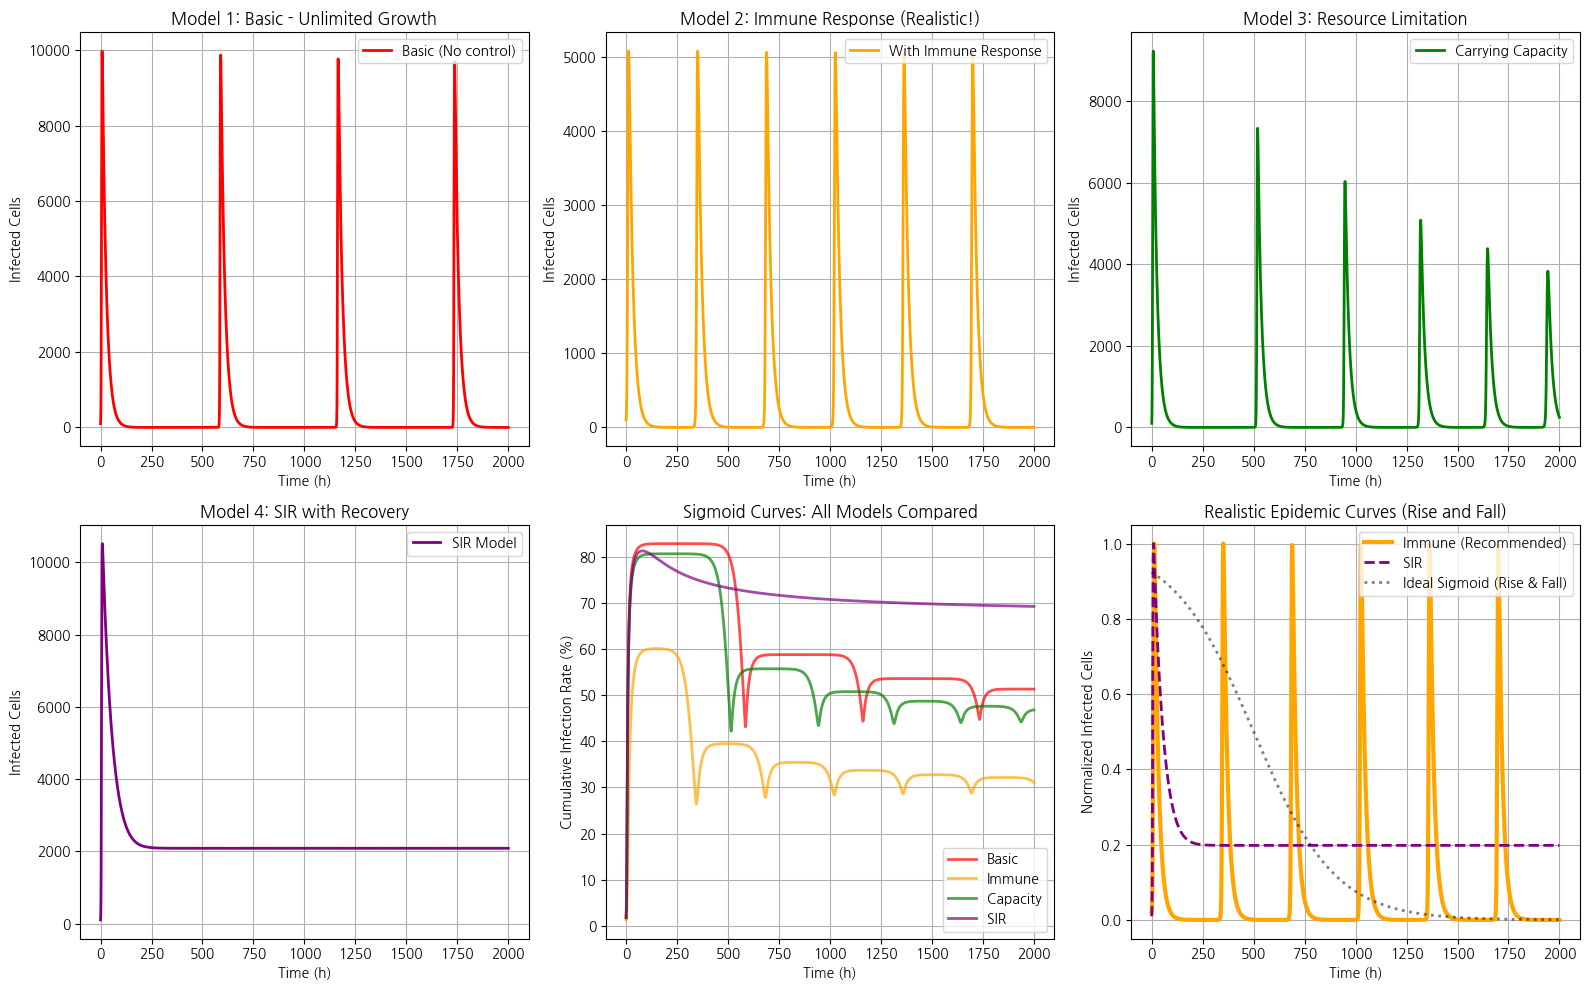

감염병 곡선 분석 - 각 모델별 피크
Model 2 (면역 반응): 피크 시간 = 12h, 최대 감염 세포 = 5073
Model 3 (수용 한계): 피크 시간 = 8h, 최대 감염 세포 = 9231
Model 4 (SIR 회복): 피크 시간 = 9h, 최대 감염 세포 = 10517

추천: Model 2 (면역 반응)가 가장 현실적인 epidemic curve를 보여줍니다!


In [30]:
import numpy as np
from scipy.integrate import solve_ivp, cumulative_trapezoid
import matplotlib.pyplot as plt

# ========== 모델 1: 기본 모델 (무한 증가) ==========
def basic_model(t, Z):
    X, Y = Z
    A = 1/24
    k = 0.0001
    d = 0.05

    dXdt = A * X - k * X * Y
    dYdt = k * X * Y - d * Y
    return [dXdt, dYdt]

# ========== 모델 2: 면역 반응 추가 (가장 현실적) ==========
def immune_model(t, Z):
    X, Y = Z
    A = 1/24       # 정상 세포 증식율
    k = 0.0001     # 감염 속도
    d = 0.05       # 기본 사멸률
    i = 0.00005    # 면역 반응 강도 (새로 추가!)

    dXdt = A * X - k * X * Y
    dYdt = k * X * Y - d * Y - i * X * Y  # 면역 반응 항 추가
    return [dXdt, dYdt]

# ========== 모델 3: Carrying Capacity (수용 한계) ==========
def capacity_model(t, Z):
    X, Y = Z
    K = 50000      # 최대 세포 수용량
    A = 1/24
    k = 0.0001
    d = 0.05

    total = X + Y
    growth_limit = 1 - total / K  # 로지스틱 성장 제한

    dXdt = A * X * growth_limit - k * X * Y
    dYdt = k * X * Y - d * Y * (1 + total / K)  # 밀도 의존적 사멸
    return [dXdt, dYdt]

# ========== 모델 4: SIR 모델 기반 (가장 전통적) ==========
def sir_model(t, Z):
    X, Y = Z
    A = 1/24       # 정상 세포 유입
    k = 0.0001     # 감염률
    r = 0.08       # 회복률 (새로 추가!)
    d = 0.02       # 자연 사멸률

    dXdt = A * X - k * X * Y + r * Y  # 회복된 세포는 다시 정상으로
    dYdt = k * X * Y - r * Y - d * Y  # 감염 세포는 회복하거나 사멸
    return [dXdt, dYdt]

# 시뮬레이션 설정
Z0 = [10000, 100]
end_t_span = 2000
t_span = (0, end_t_span)
t_points = np.linspace(0, t_span[1], 2000)

# 각 모델 실행
sol_basic = solve_ivp(basic_model, t_span, Z0, t_eval=t_points)
sol_immune = solve_ivp(immune_model, t_span, Z0, t_eval=t_points)
sol_capacity = solve_ivp(capacity_model, t_span, Z0, t_eval=t_points)
sol_sir = solve_ivp(sir_model, t_span, Z0, t_eval=t_points)

# 누적 데이터 계산
def calc_cumulative_infection_rate(sol):
    cumulative_Y = cumulative_trapezoid(sol.y[1], sol.t, initial=0)
    cumulative_X = cumulative_trapezoid(sol.y[0], sol.t, initial=0)
    cumulative_total = cumulative_X + cumulative_Y
    return cumulative_Y / cumulative_total * 100

cum_basic = calc_cumulative_infection_rate(sol_basic)
cum_immune = calc_cumulative_infection_rate(sol_immune)
cum_capacity = calc_cumulative_infection_rate(sol_capacity)
cum_sir = calc_cumulative_infection_rate(sol_sir)

# 시각화
fig = plt.figure(figsize=(16, 10))

# 각 모델의 감염 세포수 변화
ax1 = plt.subplot(2, 3, 1)
ax1.plot(sol_basic.t, sol_basic.y[1], label='Basic (No control)', color='red', linewidth=2)
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('Infected Cells')
ax1.set_title('Model 1: Basic - Unlimited Growth')
ax1.legend()
ax1.grid(True)

ax2 = plt.subplot(2, 3, 2)
ax2.plot(sol_immune.t, sol_immune.y[1], label='With Immune Response', color='orange', linewidth=2)
ax2.set_xlabel('Time (h)')
ax2.set_ylabel('Infected Cells')
ax2.set_title('Model 2: Immune Response (Realistic!)')
ax2.legend()
ax2.grid(True)

ax3 = plt.subplot(2, 3, 3)
ax3.plot(sol_capacity.t, sol_capacity.y[1], label='Carrying Capacity', color='green', linewidth=2)
ax3.set_xlabel('Time (h)')
ax3.set_ylabel('Infected Cells')
ax3.set_title('Model 3: Resource Limitation')
ax3.legend()
ax3.grid(True)

ax4 = plt.subplot(2, 3, 4)
ax4.plot(sol_sir.t, sol_sir.y[1], label='SIR Model', color='purple', linewidth=2)
ax4.set_xlabel('Time (h)')
ax4.set_ylabel('Infected Cells')
ax4.set_title('Model 4: SIR with Recovery')
ax4.legend()
ax4.grid(True)

# 누적 감염률 비교 (시그모이드 형태)
ax5 = plt.subplot(2, 3, 5)
ax5.plot(sol_basic.t, cum_basic, label='Basic', color='red', linewidth=2, alpha=0.7)
ax5.plot(sol_immune.t, cum_immune, label='Immune', color='orange', linewidth=2, alpha=0.7)
ax5.plot(sol_capacity.t, cum_capacity, label='Capacity', color='green', linewidth=2, alpha=0.7)
ax5.plot(sol_sir.t, cum_sir, label='SIR', color='purple', linewidth=2, alpha=0.7)
ax5.set_xlabel('Time (h)')
ax5.set_ylabel('Cumulative Infection Rate (%)')
ax5.set_title('Sigmoid Curves: All Models Compared')
ax5.legend()
ax5.grid(True)

# 정상화된 감염 세포수 비교
ax6 = plt.subplot(2, 3, 6)
ax6.plot(sol_immune.t, sol_immune.y[1]/sol_immune.y[1].max(),
         label='Immune (Recommended)', color='orange', linewidth=3)
ax6.plot(sol_sir.t, sol_sir.y[1]/sol_sir.y[1].max(),
         label='SIR', color='purple', linewidth=2, linestyle='--')
# 표준 시그모이드와 비교
sigmoid_t = np.linspace(0, end_t_span, 1000)
sigmoid_y = np.exp(-0.005 * (sigmoid_t - 500)) / (1 + np.exp(-0.005 * (sigmoid_t - 500)))
ax6.plot(sigmoid_t, sigmoid_y, 'k:', label='Ideal Sigmoid (Rise & Fall)', linewidth=2, alpha=0.5)
ax6.set_xlabel('Time (h)')
ax6.set_ylabel('Normalized Infected Cells')
ax6.set_title('Realistic Epidemic Curves (Rise and Fall)')
ax6.legend()
ax6.grid(True)

plt.tight_layout()
plt.show()

# 통계 출력
print("=" * 70)
print("감염병 곡선 분석 - 각 모델별 피크")
print("=" * 70)
print(f"Model 2 (면역 반응): 피크 시간 = {sol_immune.t[np.argmax(sol_immune.y[1])]:.0f}h, "
      f"최대 감염 세포 = {sol_immune.y[1].max():.0f}")
print(f"Model 3 (수용 한계): 피크 시간 = {sol_capacity.t[np.argmax(sol_capacity.y[1])]:.0f}h, "
      f"최대 감염 세포 = {sol_capacity.y[1].max():.0f}")
print(f"Model 4 (SIR 회복): 피크 시간 = {sol_sir.t[np.argmax(sol_sir.y[1])]:.0f}h, "
      f"최대 감염 세포 = {sol_sir.y[1].max():.0f}")
print("\n추천: Model 2 (면역 반응)가 가장 현실적인 epidemic curve를 보여줍니다!")